<a href="https://colab.research.google.com/github/IamSamage/Samage/blob/main/So.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

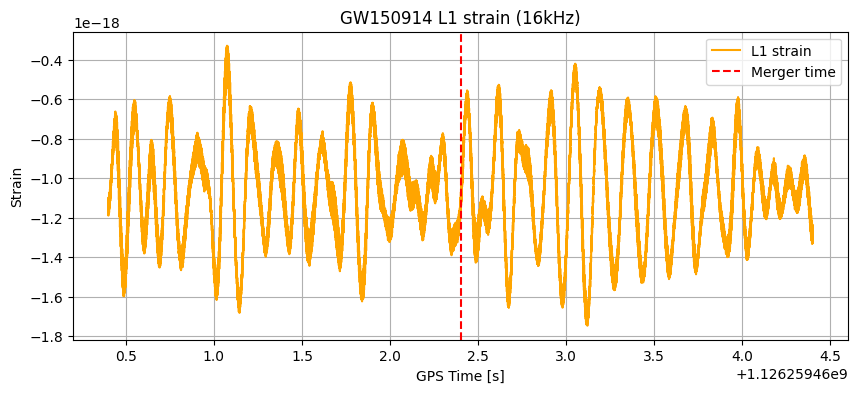

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests, gzip, shutil

url = 'https://gwosc.org/eventapi/html/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_16KHZ_R1-1126257415-4096.txt.gz'
gz_filename = 'L-L1_GWOSC_16KHZ_R1-1126257415-4096.txt.gz'
txt_filename = gz_filename.replace('.gz', '')

response = requests.get(url)
with open(gz_filename, 'wb') as f:
    f.write(response.content)

with gzip.open(gz_filename, 'rb') as f_in:
    with open(txt_filename, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

data = np.loadtxt(txt_filename)
sample_rate = 16384  # 16kHz
delta_t = 1 / sample_rate
start_gps = 1126257415  # 파일명에서 확인된 GPS 시작 시각

times = np.arange(len(data)) * delta_t + start_gps

event_time = 1126259462.4
mask = (times >= event_time - 2) & (times <= event_time + 2)
times_seg = times[mask]
strain_seg = data[mask]

plt.figure(figsize=(10, 4))
plt.plot(times_seg, strain_seg, color='orange', label='L1 strain')
plt.axvline(event_time, color='red', linestyle='--', label='Merger time')
plt.title("GW150914 L1 strain (16kHz)")
plt.xlabel("GPS Time [s]")
plt.ylabel("Strain")
plt.legend()
plt.grid()
plt.show()
